In [ ]:
import tensorflow as tf
#!pip install seaborn upgrade
from tensorflow import keras 

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
#print(sklearn.__version__)
train=pd.read_csv('/content/drive/My Drive/data_deep_learning/titanic_machine_learning_dataset_kaggle.csv')
train.head()
test=pd.read_csv('/content/drive/My Drive/data_deep_learning/titanic_ml_test_kaggle.csv')
test.head()

#print(data.shape)
##data.describe()
#sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#sns.set_style('whitegrid')
#sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

#sns.set_style('whitegrid')
#sns.countplot(x='Survived',hue='Pclass',data=data,palette='RdBu_r')

#sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=30)


#cols=['sex']


data=train.append(test)
data.shape

passenger_id=test['PassengerId']
train.head()

train.set_index(['PassengerId'],inplace=True)
train.head()


test.set_index(['PassengerId'],inplace=True)
test.head()
#print(data)
#print(train)
#train=train.iloc[:,:].values
#print(train)
train['Age'].fillna(train['Age'].median(),inplace=True)
train.head()
test['Age'].fillna(test['Age'].median(),inplace=True)
#print(train['Age'])
test['Age'].isnull().sum()

train['Embarked'].value_counts()
train['Embarked'].fillna('S',inplace=True)
train.isnull().sum()
test.isnull().sum()

test.Fare.fillna(test.Fare.mean(),inplace=True)
#print(train.isnull().sum())
#print(test.isnull().sum())

#print(train)
#for cabin
train.head()
train1=train.drop(['Cabin','Name','Ticket','Survived'],axis=1)
train.head()
y_train=train['Survived']
#print(y_train)
test=test.drop(['Cabin','Name','Ticket'],axis=1)
test.head()

from sklearn.preprocessing import LabelEncoder

label1=LabelEncoder()
train1['Sex']=label1.fit_transform(train1['Sex'])
train.head()

test['Sex']=label1.fit_transform(test['Sex'])
test.head()
label2=LabelEncoder()
train1['Embarked']=label2.fit_transform(train1['Embarked'])

train1=pd.get_dummies(train1,drop_first=True,columns=['Embarked'])
train1.head()
test=pd.get_dummies(test,drop_first=True,columns=['Embarked'])
#test.head()

train1.head()

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
train1=scale.fit_transform(train1)
test=scale.fit_transform(test)

model=Sequential()
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.fit(train1,y_train,epochs=50)

prediction=model.predict_classes(test)
print(prediction)

Epoch 1/50
28/28 [==============================] - 0s 4ms/step - loss: 0.4939 - accuracy: 0.7755
Epoch 2/50
28/28 [==============================] - 0s 4ms/step - loss: 0.4311 - accuracy: 0.8316
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.8294
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 0.3961 - accuracy: 0.8350
Epoch 5/50
28/28 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.8373
Epoch 6/50
28/28 [==============================] - 0s 4ms/step - loss: 0.3879 - accuracy: 0.8440
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 0.3892 - accuracy: 0.8272
Epoch 8/50
28/28 [==============================] - 0s 4ms/step - loss: 0.3732 - accuracy: 0.8451
Epoch 9/50
28/28 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.8451
Epoch 10/50
28/28 [==============================] - 0s 4ms/step - loss: 0.3657 - accuracy: 0.8496
Epoch 11/50
28/28 [

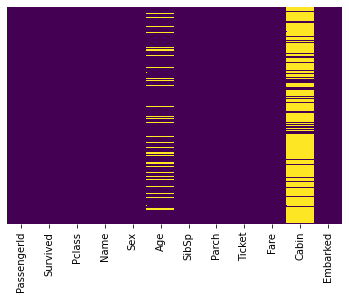

In [ ]:
import tensorflow as tf
#!pip install seaborn upgrade
from tensorflow import keras 

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
#print(sklearn.__version__)
train=pd.read_csv('/content/drive/My Drive/data_deep_learning/titanic_machine_learning_dataset_kaggle.csv')
train.head()
test=pd.read_csv('/content/drive/My Drive/data_deep_learning/titanic_ml_test_kaggle.csv')
test.head()

#print(data.shape)
##data.describe()
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


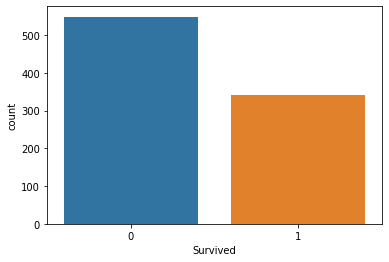

In [ ]:
sns.countplot(x='Survived',data=train)

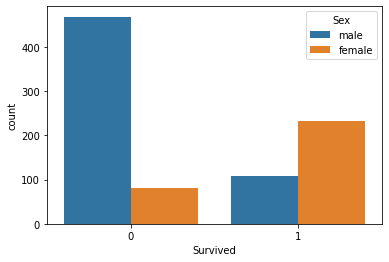

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train)

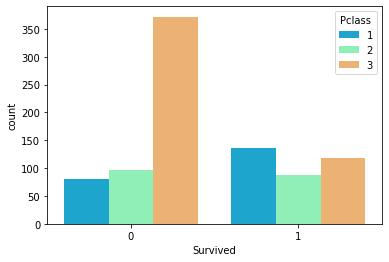

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

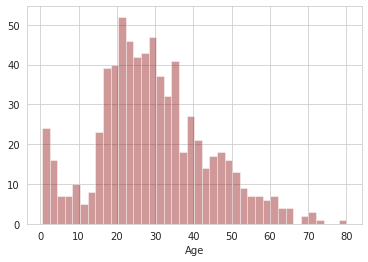

In [ ]:
sns.set_style('whitegrid')
sns.distplot(train['Age'],kde=False,color='darkred',bins=40)


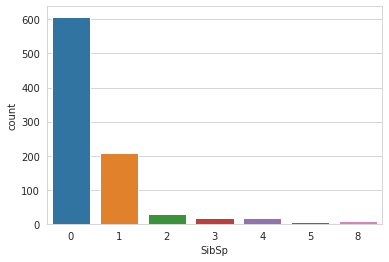

In [ ]:
sns.countplot(x='SibSp',data=train)


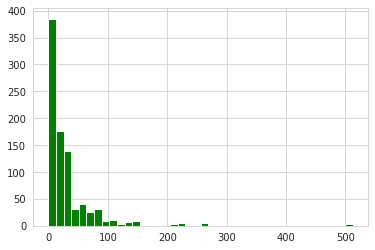

In [ ]:
train['Fare'].hist(color='green',bins=40)

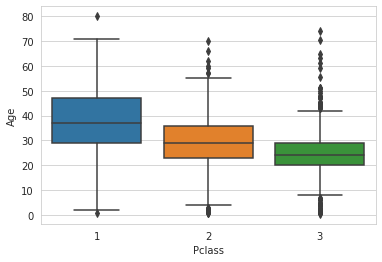

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=train)

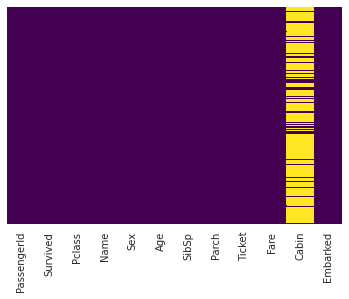

In [ ]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        elif Pclass ==3:
            return 24
    else:
        return Age
train['Age']=train[['Age','Pclass']].apply(input_age,axis=1)           
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')             